<div style="line-height:1.2;">

<h1 style="color:#BF66F2; margin-bottom: 0.3em;"> Convolutional Neural Networks in PyTorch 1 </h1>

<h4 style="margin-top: 0.3em; margin-bottom: 1em;"> Image Classification on MNIST dataset. Focus on Pillow. </h4>

<div style="line-height:1.4; margin-bottom: 0.5em;">
    <h3 style="color: lightblue; display: inline; margin-right: 0.5em;">Keywords:</h3> 
    from image to tensor + PIL.Image.open() + os.makedirs
</div>

</div>

<div style="line-height:0.5">
<h1 style="color:#BF66F2 ">  Convolutional Neural Networks in PyTorch 1 </h1>
<h4> Image Classification on MNIST dataset  with PyTorch. </h4>
</div>
<div style="margin-top: -18px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3>
    from image to tensor + PIL.Image.open() + os.makedirs
</span>
</div>

In [1]:
import os
import numpy as np

import torch
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import PIL

import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt

In [2]:
#%%script echo Uncomment if not on Colab
from google.colab import files

In [3]:
#%%script echo Uncomment if not on Colab
uploaded = files.upload()

Saving MNIST.zip to MNIST.zip


In [4]:
#%%script echo Uncomment if not on Colab
!unzip /content/MNIST.zip

Archive:  /content/MNIST.zip
   creating: MNIST/
   creating: MNIST/raw/
  inflating: MNIST/raw/t10k-images-idx3-ubyte  
 extracting: MNIST/raw/t10k-images-idx3-ubyte.gz  
  inflating: MNIST/raw/t10k-labels-idx1-ubyte  
 extracting: MNIST/raw/t10k-labels-idx1-ubyte.gz  
  inflating: MNIST/raw/train-images-idx3-ubyte  
 extracting: MNIST/raw/train-images-idx3-ubyte.gz  
  inflating: MNIST/raw/train-labels-idx1-ubyte  
 extracting: MNIST/raw/train-labels-idx1-ubyte.gz  


In [5]:
train = datasets.MNIST(root='./MNIST', train=True, download=True, transform=ToTensor())
dataset = DataLoader(train, batch_size=32)

100%|██████████| 9912422/9912422 [00:00<00:00, 144259927.98it/s]

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 64059066.01it/s]


Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36167386.07it/s]

Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 12889397.00it/s]


Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



In [6]:
class ImageClassi(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, (3,3)),                # input channels = 1 => image black and white
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)),               # output = 64
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)),
            nn.ReLU(),
            nn.Flatten(),                           # to adjust the shaving TWO PIXELs of the image everytime (2*3 = 6)
            nn.Linear(64 * (28-6) * (28-6), 10),    # 1x28x28 is the original shape, => 10 = # output classes
        )

    def forward(self, x):
        return self.model(x)

In [7]:
""" Create an instance of the neural network, loss, optimizer. """
clf = ImageClassi() #.to('cuda') not working here
opt = Adam(clf.parameters(), lr = 1e-3)
loss_fn = nn.CrossEntropyLoss()

In [10]:
#### Training
for epoch in range(2):
    for batch in dataset:
        X, y = batch
        X, y = X.to('cuda'), y.to('cuda')  # Remove if GPU not in use
        yhat = clf(X)
        loss = loss_fn(yhat, y)

        ### Apply backpropagation
        opt.zero_grad()
        loss.backward()
        opt.step()

    print(f'Epoch: {epoch}, Loss: {loss.item():.4f}')


file_where_store = './content/store/model_example_state.pt'

# Check if the directory exists, if not create it
dir_name = os.path.dirname(file_where_store)
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

# Save the model state
with open(file_where_store, 'wb') as f:
    torch.save(clf.state_dict(), f)


#with open('./content/store/model_example_state.pt', 'wb') as f:
#    save(clf.state_dict(), f)

Epoch: 0, Loss: 0.0001
Epoch: 1, Loss: 0.0002


In [19]:
### Load the saved model state
clf_pre = ImageClassi()
with open(file_where_store, 'rb') as f:
    clf_pre.load_state_dict(load(f))

In [11]:
""" Prepare the input data loading an image file and converting it to a tensor. """
# Load the MNIST dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
# Select a random test image
test_image, test_label = test_dataset[5]

# Preprocess the test image
test_image = test_image.unsqueeze(0)  #reshape operation = Add batch of dimension 1
#test_image = test_image.to('cuda')   #move to device (only if using GPU) # device = 'cuda'

100%|██████████| 9912422/9912422 [00:00<00:00, 161013238.08it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 68554439.06it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 39609916.36it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 14227430.00it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



<h3 style="color:#BF66F2"> Recap: </h3>
<div style="margin-top: -17px;">
Fluctuations in the loss during training are due to: <br>
&emsp;&emsp;_the initialization of the model parameters <br>
&emsp;&emsp;_the choice of optimizer and learning rate <br>
&emsp;&emsp;_the distribution of the training data <br>
&emsp;&emsp;_the presence of noise or outliers in the data. <br>

In [12]:
uploaded = files.upload()

Saving test_3_mnist.jpg to test_3_mnist.jpg


In [14]:
test_image2 = ToTensor()(PIL.Image.open('/content/test_3_mnist.jpg'))
test_image2 = test_image2.unsqueeze(0)
test_image2

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]])

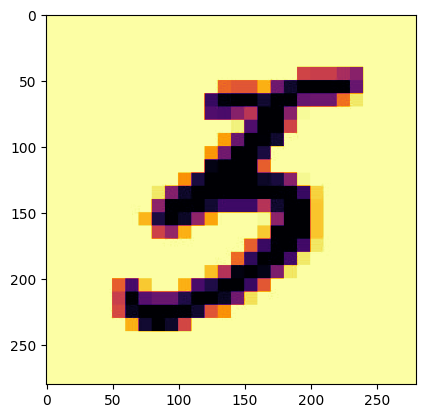

In [15]:
### Display the test image and predicted label
plt.imshow(test_image2.squeeze(), cmap='inferno')
plt.show()

In [20]:
### Make a prediction
clf_pre.eval()
with torch.no_grad():
    prediction = clf(test_image)

# Get the predicted label
predicted_label = torch.argmax(prediction, dim=1)
print(f"The predicted label is {predicted_label.item()}.")

The predicted label is 1.


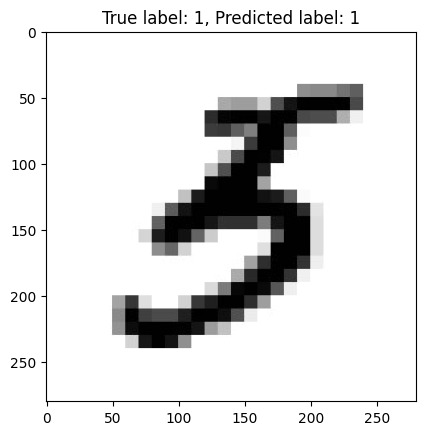

In [22]:
### Display the test image and predicted label
plt.imshow(test_image2.squeeze(), cmap='gray')
plt.title(f"True label: {test_label}, Predicted label: {predicted_label.item()}")
plt.show()